In [21]:
import pandas as pd
import numpy as np
from LogisticalRegression import LogisticalRegression
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('data_banknote_authentication.txt', sep=',')
data = data.sample(frac=1)

In [11]:
data.head()

,variance,skewness,curtosis,entropy,class
427,-1.3000,10.26780,-2.953000,-5.86380,0
1340,-4.1479,7.12250,-0.083404,-6.41720,1
25,0.7057,-5.49810,8.336800,-2.87150,0
536,2.7659,0.66216,4.149400,-0.28406,0
639,3.8846,-3.03360,2.533400,0.20214,0


In [18]:
data_x = data.drop(['class'], axis=1).values
data_y = data['class'].values
data_x_train = data_x[:int(len(data_x) * 4 / 5)]
data_y_train = data_y[:int(len(data_y) * 4 / 5)]
data_x_test = data_x[int(len(data_x) * 4 / 5):]
data_y_test = data_y[int(len(data_y) * 4 / 5):]

In [39]:
history_test_1 = []
history_test_2 = []
history_test_3 = []
for epoch in range(1, 100):
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.001)
    history_test_1.append(model.score(data_x_test, data_y_test, metric='f1'))
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.0001)
    history_test_2.append(model.score(data_x_test, data_y_test, metric='f1'))
    model = LogisticalRegression()
    model.fit(data_x_train, data_y_train, epochs=epoch, lr=0.00001)
    history_test_3.append(model.score(data_x_test, data_y_test, metric='f1'))

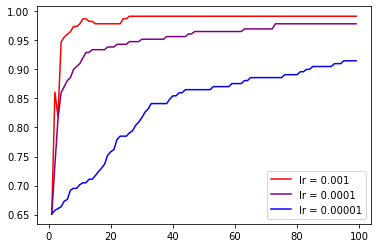

In [43]:
plt.plot(range(1, 100), history_test_1, c='red', label='lr = 0.001')
plt.plot(range(1, 100), history_test_2, c = 'purple', label='lr = 0.0001')
plt.plot(range(1, 100), history_test_3, 'blue', label='lr = 0.00001')
plt.legend()
plt.show()